In [7]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Github\VarianceArithmetic\IPyNb


In [9]:
df = pd.read_csv("../Java/Output/sinVar.txt", sep='\t')
df.head()

,NoiseType,Noise,X,sin,Error Deviation,Error Minimum,Error Maximum,Value Deviation,Uncertainty,Mean,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,Gaussian,0.2,-1.000000,-0.841471,1.00469,0.878339,8.02919,0.196985,0.196065,0.842687,...,0.039339,0.032733,0.024324,0.016717,0.010911,0.007808,0.004004,0.001902,0.000801,0.000801
1,Gaussian,0.2,-0.916667,-0.793578,1.00452,-0.238430,6.99272,0.190377,0.189520,0.541108,...,0.038666,0.029851,0.023239,0.018231,0.010618,0.009216,0.005109,0.002604,0.001503,0.000501
2,Gaussian,0.2,-0.833333,-0.740177,1.00434,-1.238150,6.07259,0.171101,0.170362,0.251227,...,0.036180,0.028362,0.022149,0.018040,0.012628,0.008519,0.006915,0.003307,0.002305,0.001203
3,Gaussian,0.2,-0.750000,-0.681639,1.00412,-2.264000,5.13233,0.140594,0.140018,-0.010471,...,0.033628,0.026601,0.021682,0.018671,0.012849,0.007529,0.008031,0.004919,0.002610,0.001907
4,Gaussian,0.2,-0.666667,-0.618370,1.00383,-3.781150,3.91804,0.101316,0.100930,-0.229733,...,0.029800,0.022853,0.022148,0.016410,0.012886,0.010370,0.006242,0.007148,0.004128,0.002718


In [10]:
sorted(df['Noise'].unique())

[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0.2]

In [11]:
sNoise=sorted(df[df['Noise'] > 1e-5]['Noise'].unique())

In [12]:
dfF = df[(df['NoiseType'] == 'Gaussian') & (df['Noise'] > 1e-15)]
dfF['Error Deviation'].mean(), dfF['Error Deviation'].std()

(9.381588194285714, 77.67473643036314)

In [13]:
dfF = df[(df['NoiseType'] == 'Gaussian') & (df['Noise'] >= 1e-8)]
dfF['Error Deviation'].mean(), dfF['Error Deviation'].std()

(9.381588194285714, 77.67473643036314)

# Deviation vs Uncertainty

In [40]:
def PlotValues( sValue=['Value Deviation', 'Uncertainty'], 
                sNoise=sNoise, noiseType='Gaussian',
                sStyle=['x', '-', '--', '+'], sColor = ['r','g','b','y','c','m']):
    fig, ax = plt.subplots()
    ax.set_title('sin(x +/- noise)')
    ax.set_xlabel('x')
    ax.set_ylabel(' or '.join(sValue))
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        for value, style in zip(sValue, sStyle):
            dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['X'], dfPlot[value], ''.join([color, style]), label=f'{noise} {value}')
    ax.legend(bbox_to_anchor=(1.1, 1.05))

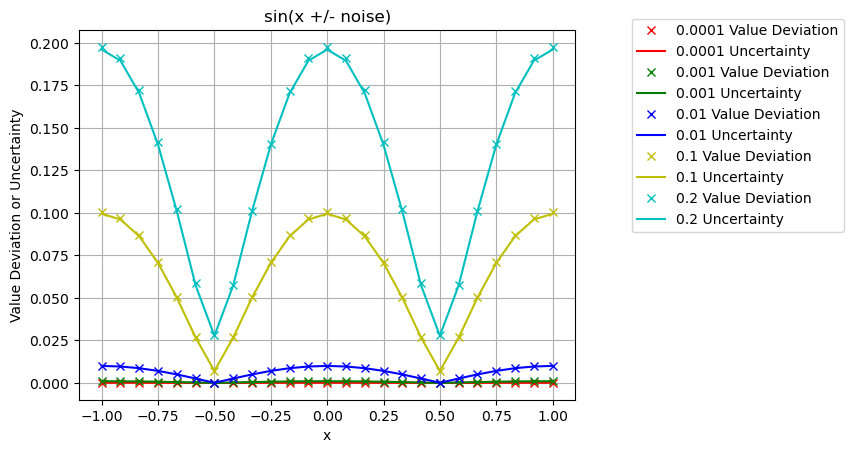

In [41]:
PlotValues()

In [42]:
def PlotErrorDev( noiseType='Gaussian', sNoise=(0.5, 1e-1, 1e-2, 1e-3, 1e-4),
                  sColor = ['r','g','b','y','c','m'] ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$\sin(x \pm \delta x)$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    ax.grid(True)
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], ''.join([color, '-']), label=f'{noise} Uncertainty')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], ''.join([color, '--']), label=f'{noise:.0e} Error Deviation')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], ''.join([color, 'x']), label=f'{noise:.0e} Value Deviation')

    ax.legend(bbox_to_anchor=(1.57, 1.0))
    ax2.legend(bbox_to_anchor=(1.57, 0.3))

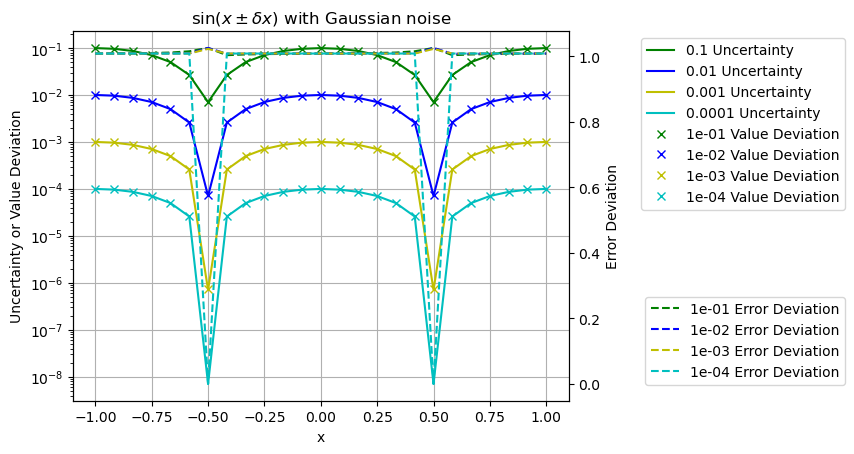

In [43]:
PlotErrorDev()

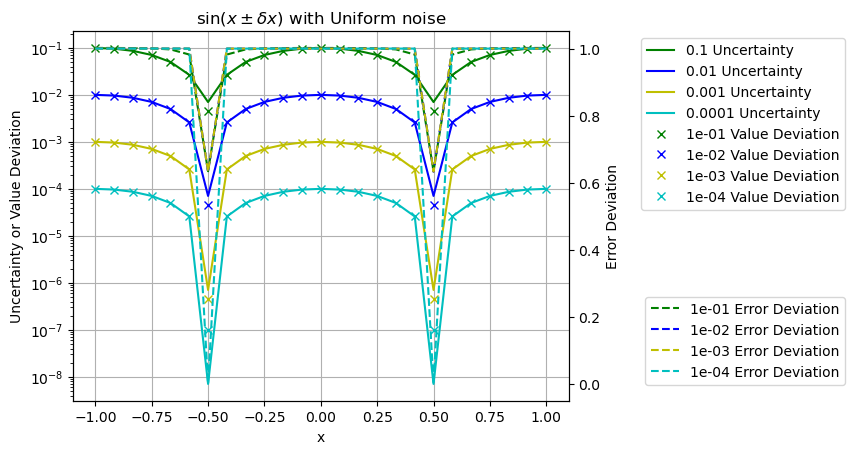

In [44]:
PlotErrorDev('Uniform')

In [45]:
def PlotErrorDev( noiseType='Gaussian', sNoiseStyleMarker=[(0.2,'-','<'), (1e-1,'-.','>'), (1e-2,':','^'), (1e-3,'--','v')],
                  ylim=(1e-6, 1e1) ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$\sin(x \pm \delta x)$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    ax.grid(True)
    for noise, style, marker in sNoiseStyleMarker:
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], f'k{style}', label=f'{noise} Uncertainty')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], f'k{marker}', label=f'{noise} Value Deviation')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    for noise, style, marker in sNoiseStyleMarker:
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], c='gray', ls=style, label=f'{noise} Error Deviation')

    ax.legend(bbox_to_anchor=(1.58, 0.5))
    ax2.legend(bbox_to_anchor=(1.15, 0.9))

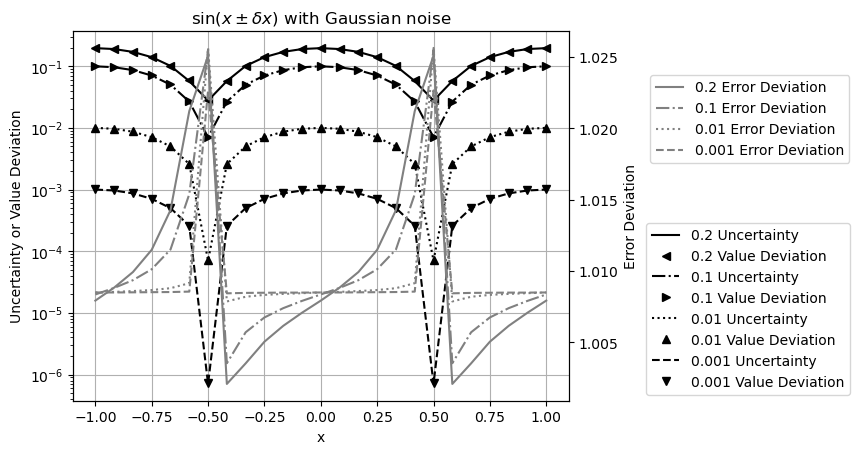

In [46]:
PlotErrorDev()

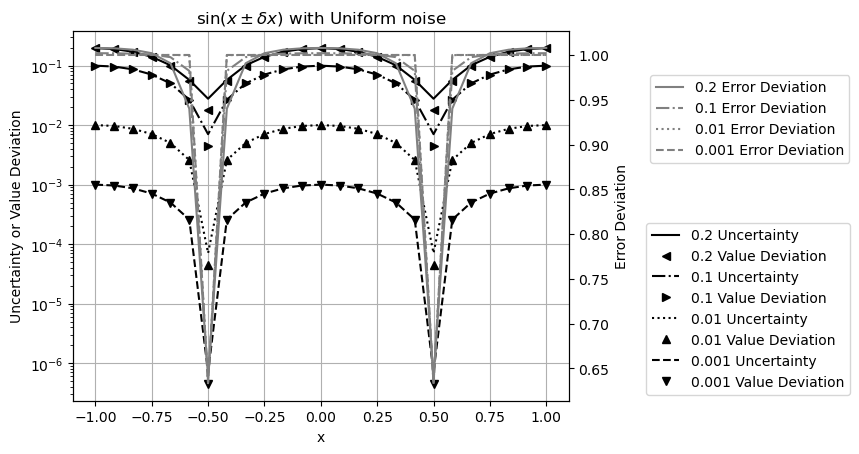

In [47]:
PlotErrorDev('Uniform')

# Mean vs Bias

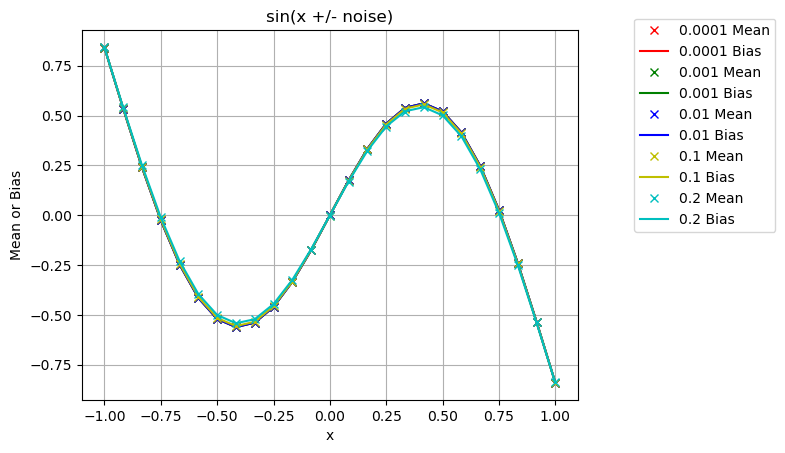

In [48]:
PlotValues(sValue=['Mean', 'Bias'])

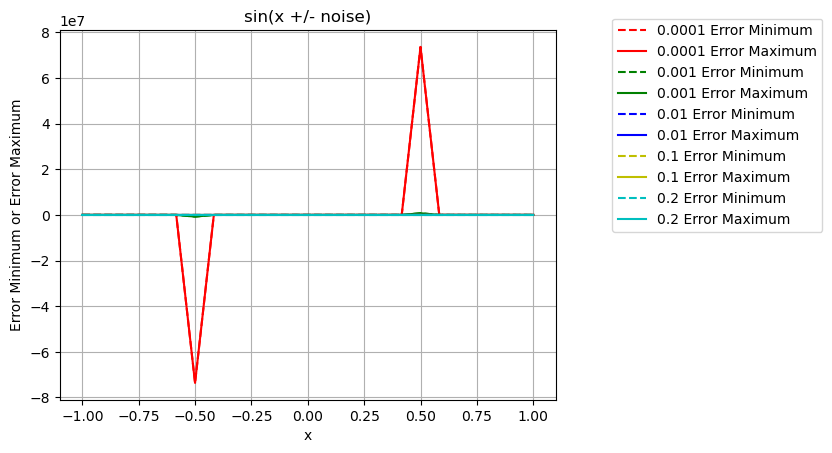

In [49]:
PlotValues(sValue=['Error Minimum', 'Error Maximum'], sStyle=['--', '-'])

# vs Noise vs X

In [50]:
def PlotSurface(value, noiseType, cmap=None):
    logz = (value == 'Uncertainty')
    dfOrderVsNoise = df[(df['NoiseType']==noiseType) & (df['Noise']!=0)]\
                .pivot(index='Noise', columns='X', values=value)
    sOrder = dfOrderVsNoise.columns.values
    sNoise = dfOrderVsNoise.index.values
    sX, sY = np.meshgrid(sOrder, sNoise)
    sY = np.log10(sY)
    sZ = np.log10(dfOrderVsNoise.values) if logz else dfOrderVsNoise.values
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(30, -45) if logz else ax.view_init(30, 45)
    surf = ax.plot_surface( sX, sY, sZ, cmap=cmap if cmap else plt.cm.spring if logz else plt.cm.winter )
    cb = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.15)
    
    ax.set_title(r'$\sin(x \pm \delta x)$ with ' + noiseType + ' noise')
    
    ax.set_xlabel('X')
    sXTick = [sOrder[i] for i in range(0, len(sOrder), 4)]
    ax.set_xticks(sXTick, [f'{x:.3}' for x in sXTick])
    
    ax.set_ylabel('Input Noise')
    sYTick = [sNoise[i] for i in range(0, len(sNoise), 3)]
    ax.set_yticks(np.log10(sYTick), [f'{y:.1e}' for y in sYTick])
    
    ax.set_zlabel(value)
    if value == 'Error Deviation':
        pass
        # TODO: adjust color range 
        # ax.set_zlim([0, 2])
        # cb.set_clim([0, 2])
    if logz:
        zMin = int(math.floor(np.min(sZ)))
        zMax = int(math.ceil(np.max(sZ)))
        sZTick = range(zMin, zMax, int(math.ceil((zMax - zMin)/10)))
        ax.set_zticks(sZTick, [f'1e{z:+}' for z in sZTick])

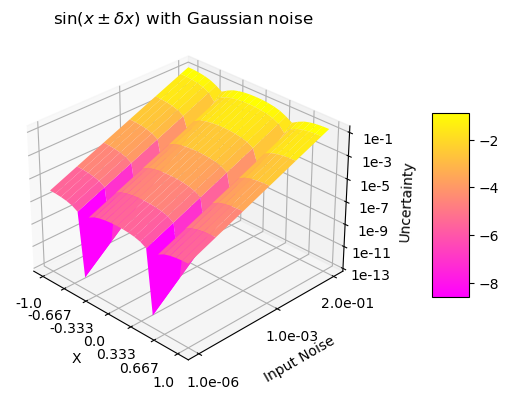

In [51]:
PlotSurface('Uncertainty', 'Gaussian')

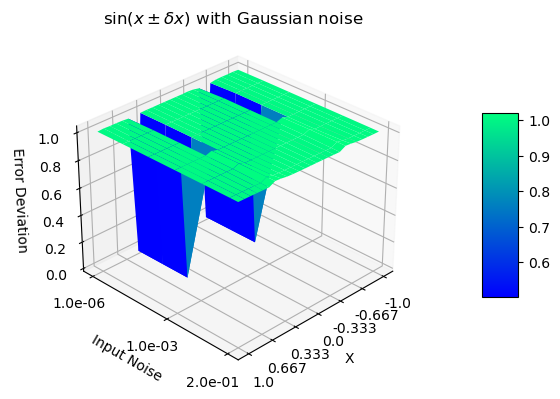

In [52]:
PlotSurface('Error Deviation', 'Gaussian')

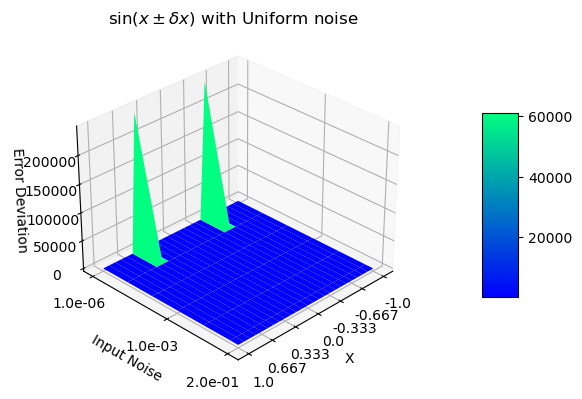

In [53]:
PlotSurface('Error Deviation', 'Uniform')

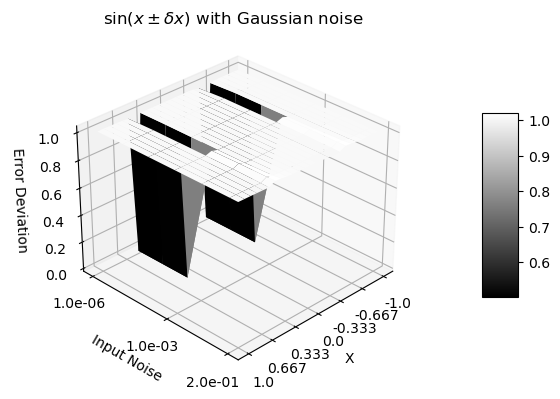

In [54]:
PlotSurface('Error Deviation', 'Gaussian', cmap=plt.cm.gray)

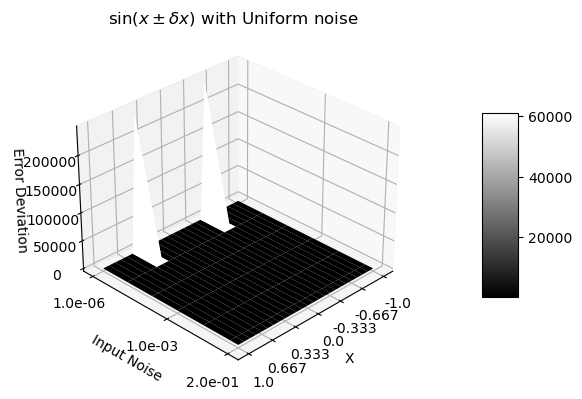

In [55]:
PlotSurface('Error Deviation', 'Uniform', cmap=plt.cm.gray)

In [56]:
df[(df['NoiseType']=='Gaussian') & (df['Noise']>=1e-15) & 
   ((np.abs(df['X'])<(math.pi/2-1e-15)) | (np.abs(df['X'])>(math.pi/2+1e-15)))]['Error Deviation'].describe()

count    175.000000
mean       0.974553
std        0.184202
min        0.000000
25%        1.008220
50%        1.008500
75%        1.008550
max        1.025640
Name: Error Deviation, dtype: float64

In [57]:
df[(df['NoiseType']=='Uniform') & (df['Noise']>=1e-15) & 
   ((np.abs(df['X'])<(math.pi/2-1e-15)) | (np.abs(df['X'])>(math.pi/2+1e-15)))]['Error Deviation'].describe()

count       175.000000
mean       2801.816263
std       26124.229208
min           0.000000
25%           1.000065
50%           1.000110
75%           1.000130
max      245076.000000
Name: Error Deviation, dtype: float64

# Histogram

In [58]:
sHisto = [str(i/10) for i in range(-29, 30, 2)]
df[sHisto].head()

KeyError: "None of [Index(['-2.9', '-2.7', '-2.5', '-2.3', '-2.1', '-1.9', '-1.7', '-1.5', '-1.3',\n       '-1.1', '-0.9', '-0.7', '-0.5', '-0.3', '-0.1', '0.1', '0.3', '0.5',\n       '0.7', '0.9', '1.1', '1.3', '1.5', '1.7', '1.9', '2.1', '2.3', '2.5',\n       '2.7', '2.9'],\n      dtype='object')] are in the [columns]"

In [ ]:
def PlotHisto( noiseType='Gaussian', sNoise=(1e-6, 1e-16), sX=(0, math.pi/4, math.pi/2), 
               style=['gx','c-', 'b--', 'g-', 'c--', 'b-']):
    df['algo'] = df['NoiseType'] + " " + df['Noise'].astype(str) + " " + df['X'].astype(str)
    dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise'].isin(sNoise)) & (df['X'].isin(sX))].set_index('algo')
    ax = dfPlot[sHisto].T.plot(style=style, grid=True, xlabel='Normalized Error', ylabel='Normalized Count',
                              title=r'Histogram for Normalized Error of $\sin(x + \delta x)$')
    ax.legend(bbox_to_anchor=(1, 1))    


In [ ]:
PlotHisto()

In [ ]:
PlotHisto(sNoise=(1e-9, 1e-16), sX=(0, math.pi/2), style=['gx','bx', 'g--', 'b-'])

In [ ]:
PlotHisto(sNoise=(1e-8, 1e-16), sX=(0, math.pi/2), style=['gx','b--', 'g--', 'b-'])

In [ ]:
PlotHisto(sNoise=(1e-7, 1e-16), sX=(0, math.pi/2), style=['gx','b--', 'g--', 'b-'])

In [ ]:
PlotHisto(sNoise=(1e-6, 1e-16), sX=(0, math.pi/2), style=['gx','b--', 'g--', 'b-'])

In [ ]:
PlotHisto(sNoise=(1e-5, 1e-16), sX=(0, math.pi/2), style=['gx','b--', 'g--', 'b-'])

In [ ]:
PlotHisto(sNoise=(1e-1, 1e-16), sX=(0, math.pi/2), style=['gx','b--', 'g--', 'b-'])

In [ ]:
PlotHisto(sNoise=(1e-3,), sX=(0, -math.pi/2, math.pi/2, math.pi/4), style=['m-', 'c-', 'bx', 'g-'])

In [ ]:
PlotHisto(sNoise=(1e-3,), sX=(0, -math.pi/2, math.pi/2, math.pi/4), style=['k--', 'k:', 'kx', 'k-'])